# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
import json

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
#
# # Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/siyuanliang/BootCamp_University/Python-api-challenge/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [104]:
cities
# set a empty list
List = [[],[],[],[],[],[],[],[],[],[]]
i = 1
for city in cities:
    url = ("https://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid="+ weather_api_key+"&units=imperial")
    response = requests.get(url).json()
    print(response)
    print(city)



    if response["cod"] == '404': #could also check == requests.codes.ok
        continue
    # put the information into List
    List[6].append(i)
    i+=1

    temperature = response["main"]["temp_max"]
    List[0].append(temperature)
    latitude = response["coord"]["lat"]
    List[1].append(latitude)
    longitude = response["coord"]["lon"]
    List[7].append(longitude)
    Humidity = response['main']['humidity']
    List[2].append(Humidity)
    Cloudiness = response['clouds']['all']
    List[3].append(Cloudiness)
    WindSpeed = response['wind']['speed']
    List[4].append(WindSpeed)
    List[5].append(city)
    Country = response['sys']['country']
    List[8].append(Country)
    Date = response['dt']
    List[9].append(Date)


{'coord': {'lon': -158.0072, 'lat': 21.3156}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 77.92, 'temp_min': 72.77, 'temp_max': 78.75, 'pressure': 1013, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 20}, 'clouds': {'all': 100}, 'dt': 1665215568, 'sys': {'type': 2, 'id': 47742, 'country': 'US', 'sunrise': 1665159894, 'sunset': 1665202463}, 'timezone': -36000, 'id': 5855051, 'name': '‘Ewa Beach', 'cod': 200}
ewa beach
{'coord': {'lon': 167.6833, 'lat': -46.1333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 47.75, 'feels_like': 45.09, 'temp_min': 47.75, 'temp_max': 47.75, 'pressure': 1030, 'humidity': 75, 'sea_level': 1030, 'grnd_level': 1027}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 9, 'gust': 10.85}, 'clouds': {'all': 94}, 'dt': 1665215568, 'sys': {'country': 'NZ', 

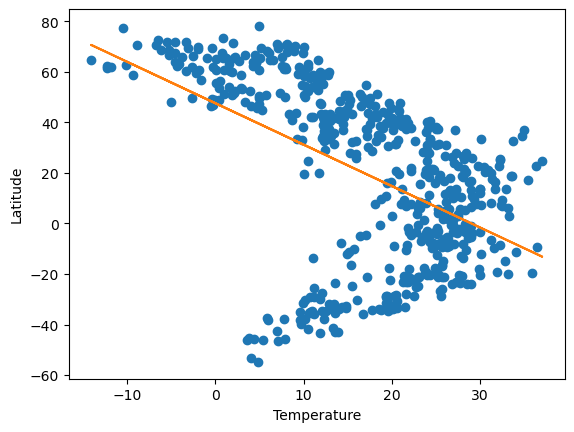

In [58]:
# A series of scatter plots to showcase
# Temperature (F) vs. Latitude

#obtain m (slope) and b(intercept) of linear regression line
m = np.polyfit(List[0],List[1],1)
f = np.poly1d(m)
plt.plot(List[0],List[1],"o", List[0], f(List[0]))
plt.xlabel("Temperature")
plt.ylabel("Latitude")

plt.show()
# At the start of the latitude, temperature was lowest, and following that increasing latitude, the temperature
# become higher, but when latitude pass 0, the more latitude is reducing, the temperature is lower again.
#







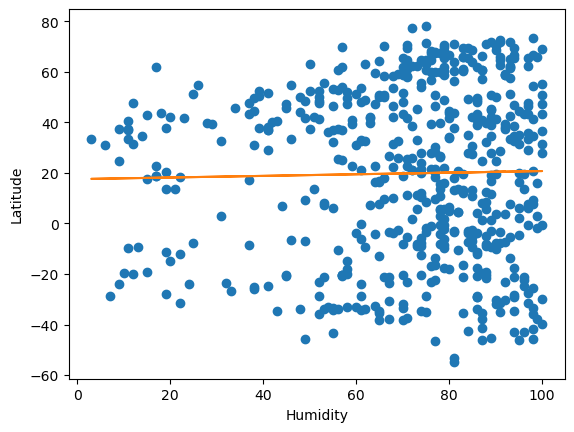

In [59]:
# Humidity (%) vs. Latitude
m = np.polyfit(List[2],List[1],1)
f = np.poly1d(m)
plt.plot(List[2],List[1],"o", List[2], f(List[2]))
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.show()

# the more




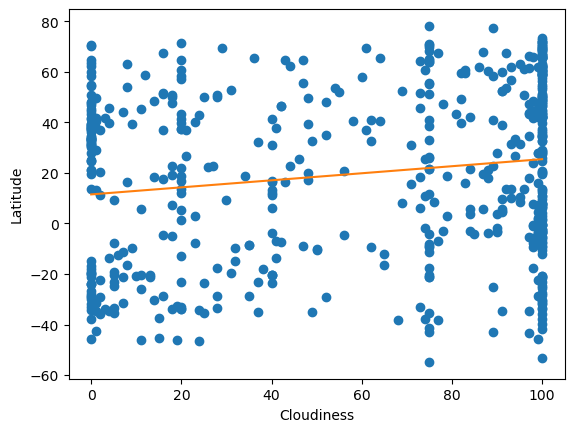

In [60]:
# Cloudiness (%) vs. Latitude
m = np.polyfit(List[3],List[1],1)
f = np.poly1d(m)
plt.plot(List[3],List[1],"o", List[3], f(List[3]))
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")


plt.show()

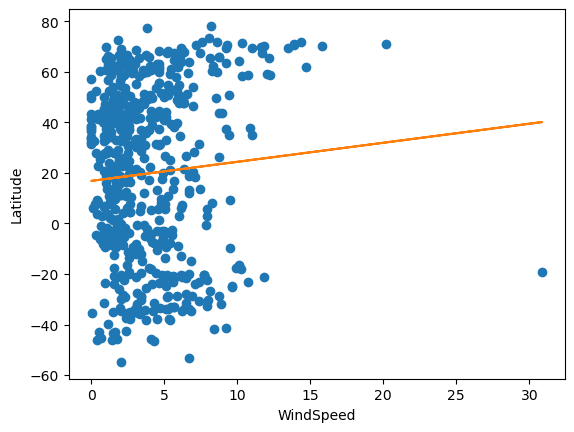

In [61]:
# WindSpeed (%) vs. Latitude
m = np.polyfit(List[4],List[1],1)
f = np.poly1d(m)
plt.plot(List[4],List[1],"o", List[4], f(List[4]))
plt.xlabel("WindSpeed")
plt.ylabel("Latitude")
plt.show()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [105]:
# Create a DataFrame
d = {"City_ID":List[6],"City":List[5],"City Country":List[8],"City date":List[9],"Lat":List[1],"Lng":List[7],'Max Temp': List[0],"Humidity":List[2],'Cloudiness':List[3],"Wind Speed":List[4]}
df = pd.DataFrame(data = d)
df

,City_ID,City,City Country,City date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,1,ewa beach,US,1665215568,21.3156,-158.0072,78.75,75,100,5.75
1,2,tuatapere,NZ,1665215568,-46.1333,167.6833,47.75,75,94,5.82
2,3,chokurdakh,RU,1665215569,70.6333,147.9167,23.50,88,100,24.34
3,4,albany,US,1665215317,42.6001,-73.9662,46.51,79,100,8.84
4,5,rikitea,PF,1665215569,-23.1203,-134.9692,71.24,66,3,20.83
...,...,...,...,...,...,...,...,...,...,...
559,560,hambantota,LK,1665215380,6.1241,81.1185,95.34,46,40,11.50
560,561,keskin,TR,1665215348,39.6731,33.6136,51.37,80,100,1.21
561,562,vestmannaeyjar,IS,1665215380,63.4427,-20.2734,47.07,85,100,10.00
562,563,road town,VG,1665215105,18.4167,-64.6167,80.69,75,3,17.81


In [106]:
# Convert it into Csv
df.to_csv("/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Whether.csv")

In [107]:
# Separate the Northern and Southern Hemisphere
Northern = df[df["Lat"]>=0]
Northern
Southern = df[df["Lat"]<0]
Southern

,City_ID,City,City Country,City date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,2,tuatapere,NZ,1665215568,-46.1333,167.6833,47.75,75,94,5.82
4,5,rikitea,PF,1665215569,-23.1203,-134.9692,71.24,66,3,20.83
5,6,caravelas,BR,1665215569,-17.7125,-39.2481,73.89,90,50,10.65
11,12,faanui,PF,1665215572,-16.4833,-151.7500,77.99,78,10,17.92
12,13,mahebourg,MU,1665215335,-20.4081,57.7000,77.29,61,40,17.27
...,...,...,...,...,...,...,...,...,...,...
531,532,madimba,TZ,1665215735,-10.4000,40.3333,82.72,58,41,10.07
543,544,parana,AR,1665215739,-31.7320,-60.5238,65.57,59,0,16.02
550,551,madang,PG,1665215740,-5.2246,145.7966,81.72,80,28,9.42
552,553,mount isa,AU,1665215741,-20.7333,139.5000,85.77,30,5,21.85


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

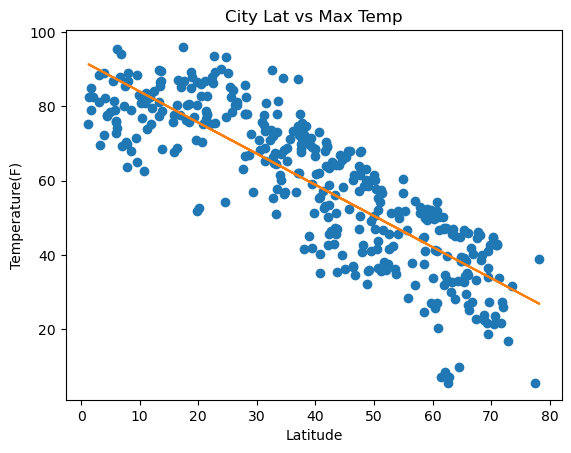

In [130]:
# Northern Hemisphere - Temperature (F) vs. Latitude
m = np.polyfit(Northern['Lat'],Northern["Max Temp"],1)
f = np.poly1d(m)
plt.plot(Northern['Lat'],Northern["Max Temp"],"o", Northern['Lat'], f(Northern['Lat']))
plt.title("City Lat vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Northern City Lat vs Max Temp.png')


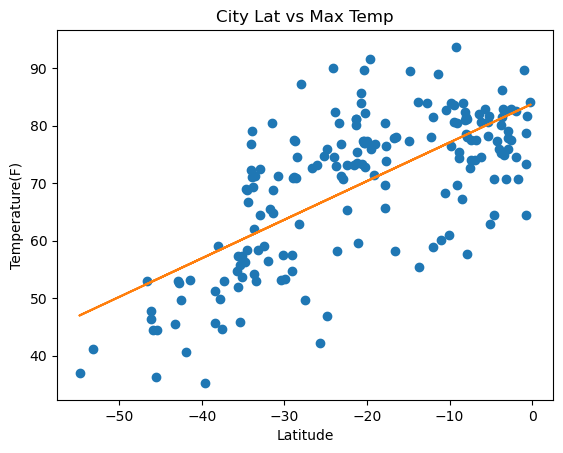

In [131]:
# Southern Hemisphere - Temperature (F) vs. Latitude
m = np.polyfit(Southern['Lat'],Southern["Max Temp"],1)
f = np.poly1d(m)
plt.plot(Southern['Lat'],Southern["Max Temp"],"o", Southern['Lat'], f(Southern['Lat']))
plt.title("City Lat vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Southern City Lat vs Max Temp.png')

## Latitude vs. Humidity Plot

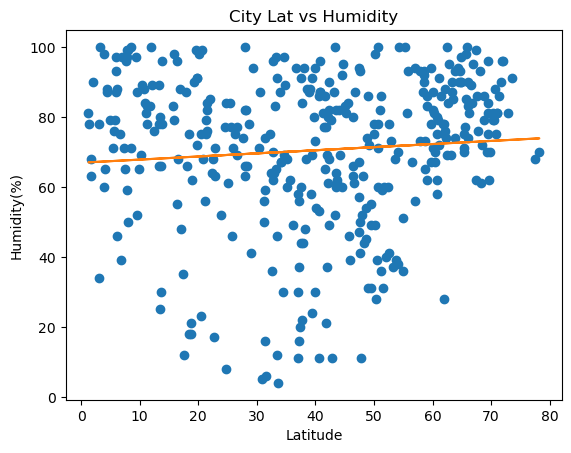

In [132]:
# Northern Hemisphere - Humidity (%) vs. Latitude
m = np.polyfit(Northern['Lat'],Northern["Humidity"],1)
f = np.poly1d(m)
plt.plot(Northern['Lat'],Northern["Humidity"],"o", Northern['Lat'], f(Northern['Lat']))
plt.title("City Lat vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Northern City Lat vs Humidity.png')

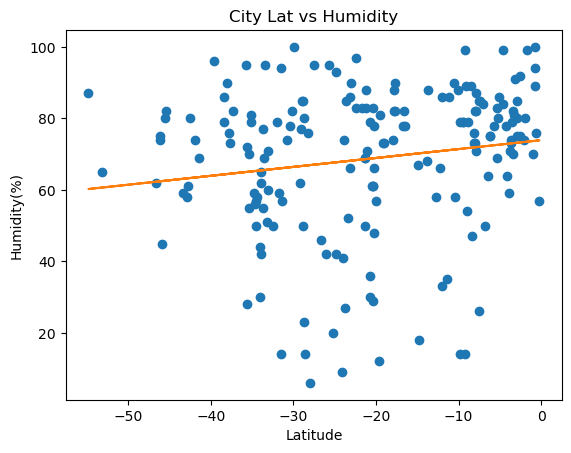

In [133]:
# Southern Hemisphere - Humidity (%) vs. Latitude
m = np.polyfit(Southern['Lat'],Southern["Humidity"],1)
f = np.poly1d(m)
plt.plot(Southern['Lat'],Southern["Humidity"],"o", Southern['Lat'], f(Southern['Lat']))
plt.title("City Lat vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Southern City Lat vs Humidity.png')

## Latitude vs. Cloudiness Plot

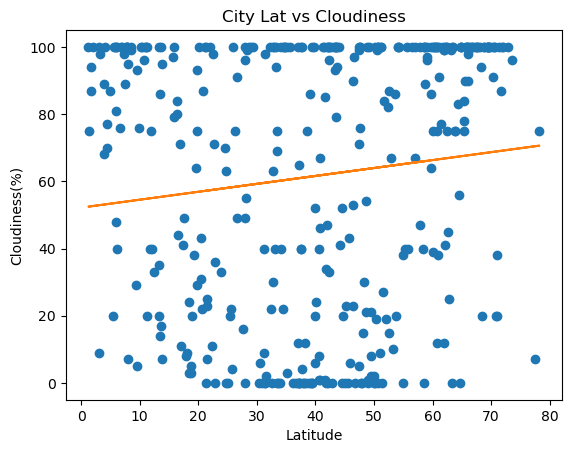

In [134]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
m = np.polyfit(Northern['Lat'],Northern["Cloudiness"],1)
f = np.poly1d(m)
plt.plot(Northern['Lat'],Northern["Cloudiness"],"o", Northern['Lat'], f(Northern['Lat']))
plt.title("City Lat vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Northern City Lat vs Cloudiness.png')

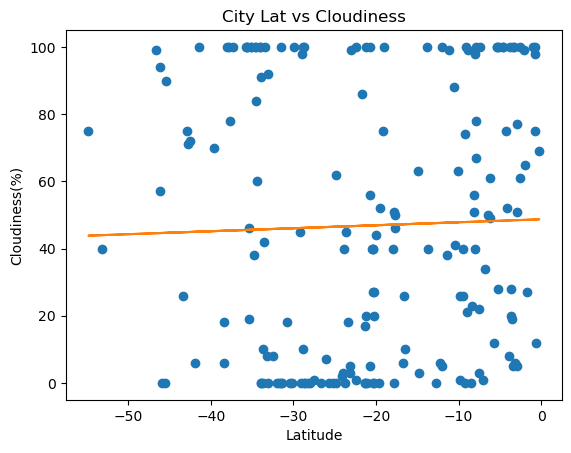

In [135]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
m = np.polyfit(Southern['Lat'],Southern["Cloudiness"],1)
f = np.poly1d(m)
plt.plot(Southern['Lat'],Southern["Cloudiness"],"o", Southern['Lat'], f(Southern['Lat']))
plt.title("City Lat vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Southern City Lat vs Cloudiness.png')

## Latitude vs. Wind Speed Plot

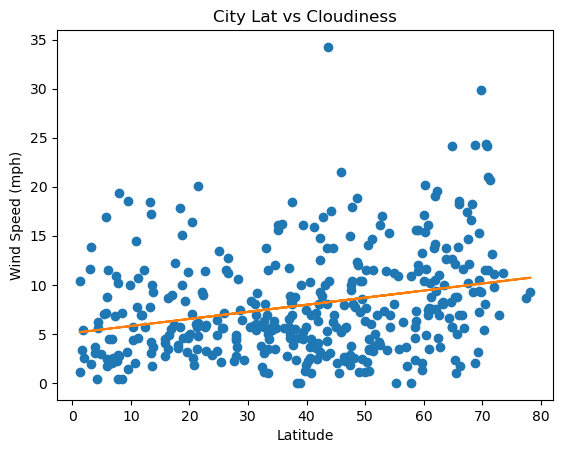

In [136]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
m = np.polyfit(Northern['Lat'],Northern["Wind Speed"],1)
f = np.poly1d(m)
plt.plot(Northern['Lat'],Northern["Wind Speed"],"o", Northern['Lat'], f(Northern['Lat']))
plt.title("City Lat vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Northern City Lat vs Wind Speed.png')

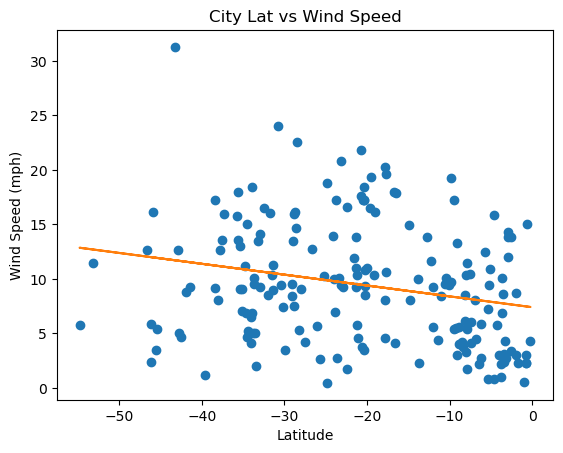

In [137]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
m = np.polyfit(Southern['Lat'],Southern["Wind Speed"],1)
f = np.poly1d(m)
plt.plot(Southern['Lat'],Southern["Wind Speed"],"o", Southern['Lat'], f(Southern['Lat']))
plt.title("City Lat vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Southern City Lat vs Wind Speed.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [141]:
linregress(Northern['Lat'],Northern["Max Temp"])

LinregressResult(slope=-0.8363809659522502, intercept=92.31724622370994, rvalue=-0.8429241880042191, pvalue=1.5921755860168057e-103, stderr=0.027494975762423886, intercept_stderr=1.2229861585902342)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [142]:
linregress(Southern['Lat'],Southern["Max Temp"])

LinregressResult(slope=0.671744236297625, intercept=83.805121370118, rvalue=0.6933733658237188, pvalue=7.626621354190397e-28, stderr=0.051605091075305906, intercept_stderr=1.2736497883308329)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [143]:
linregress(Northern['Lat'],Northern["Humidity"])

LinregressResult(slope=0.08895841873910672, intercept=66.91561727142283, rvalue=0.08156280020249551, pvalue=0.11290829845688977, stderr=0.055985409048134545, intercept_stderr=2.4902506167128524)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [144]:
linregress(Southern['Lat'],Southern["Humidity"])

LinregressResult(slope=0.24936111722758156, intercept=73.91552924990292, rvalue=0.15897942394233974, pvalue=0.030659547629917953, stderr=0.11447310019578856, intercept_stderr=2.8252762817757713)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [145]:
linregress(Northern['Lat'],Northern["Cloudiness"])

LinregressResult(slope=0.23583533536232712, intercept=52.17127559394602, rvalue=0.11914448812276297, pvalue=0.02033526075603026, stderr=0.1012184455909923, intercept_stderr=4.502231935806202)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [146]:
linregress(Southern['Lat'],Southern["Cloudiness"])

LinregressResult(slope=0.08884494661186489, intercept=48.701704107246314, rvalue=0.03007462414351395, pvalue=0.6844645009932453, stderr=0.21827825968149048, intercept_stderr=5.387260315747925)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [147]:
linregress(Northern['Lat'],Northern["Wind Speed"])

LinregressResult(slope=0.07219843231791997, intercept=5.0800735893319615, rvalue=0.2699652427506439, pvalue=9.411684169777206e-08, stderr=0.01326224129377822, intercept_stderr=0.5899091410126317)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [148]:
linregress(Southern['Lat'],Southern["Wind Speed"])

LinregressResult(slope=-0.09964017859412351, intercept=7.397902645333048, rvalue=-0.23645583191436115, pvalue=0.00119351620110359, stderr=0.030266716468835202, intercept_stderr=0.7470037591397232)